In [1]:
import pandas as pd

# Load the datasets with memory optimization
df_2012 = pd.read_csv(r"F:\PYTHON Project Jupyter\2012_Data.csv", encoding='ISO-8859-1', low_memory=False)
df_2013 = pd.read_csv(r"F:\PYTHON Project Jupyter\2013_Data.csv", encoding='ISO-8859-1', low_memory=False)

print(f"2012 Data Shape: {df_2012.shape}")
print(f"2013 Data Shape: {df_2013.shape}")
# Display the first few rows
print(df_2012.head())
print(df_2013.head())

2012 Data Shape: (1037205, 41)
2013 Data Shape: (951177, 41)
   accounting_date  fiscal_year  fiscal_month  calendar_year  calendar_month  \
0         20120509         2012            11           2012               5   
1         20120216         2012             8           2012               2   
2         20120509         2012            11           2012               5   
3         20120518         2012            11           2012               5   
4         20120109         2012             7           2012               1   

   calendar_day  company_code customer_code  customer_district_code  \
0             9           101     411800601                     410   
1            16           101     361000403                     300   
2             9           101     361000403                     300   
3            18           101     565540415                     500   
4             9           101     565540415                     500   

                        item_co

In [2]:
# Display column names
print("Columns in 2012 Data:")
print(df_2012.columns)

print("\nColumns in 2013 Data:")
print(df_2013.columns)


Columns in 2012 Data:
Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'calendar_month', 'calendar_day', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'technology_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'abc_class_volume',
       'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'item_source_class',
       'invoice_number', 'line_number', 'invoice_date',
       'customer_order_number', 'order_date', 'dss_update_time'],
      dtype='object')

Columns in 2013 Data:
Index(['accounting_date', 'fiscal_year', 'fiscal_month

In [3]:
# Print the count of missing values in each column for both DataFrames
print("Missing Values in df_2012:")
print(df_2012.isnull().sum())

print("\nMissing Values in df_2013:")
print(df_2013.isnull().sum())

# Drop columns with more than 50% missing data
df_2012 = df_2012.dropna(axis=1, thresh=len(df_2012) * 0.5)
df_2013 = df_2013.dropna(axis=1, thresh=len(df_2013) * 0.5)

# Filling missing values in the 'value_sales' column with mean
df_2012['value_sales'] = df_2012['value_sales'].fillna(df_2012['value_sales'].mean())
df_2013['value_sales'] = df_2013['value_sales'].fillna(df_2013['value_sales'].mean())

# Print the missing values again after handling
print("\nMissing Values in df_2012 after cleaning:")
print(df_2012.isnull().sum())

print("\nMissing Values in df_2013 after cleaning:")
print(df_2013.isnull().sum())


Missing Values in df_2012:
accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                  0
o

In [4]:
# Check for duplicates
print(f"Duplicates in 2012 data: {df_2012.duplicated().sum()}")
print(f"Duplicates in 2013 data: {df_2013.duplicated().sum()}")

# Drop duplicate rows, if any
df_2012 = df_2012.drop_duplicates()
df_2013 = df_2013.drop_duplicates()


Duplicates in 2012 data: 4832
Duplicates in 2013 data: 3382


In [5]:
print(df_2012.dtypes)
print(df_2013.dtypes)
df_2012['order_date'] = pd.to_datetime(df_2012['order_date'], errors='coerce')
df_2013['order_date'] = pd.to_datetime(df_2013['order_date'], errors='coerce')
# Ensure 'value_sales' column is numeric
df_2012['value_sales'] = pd.to_numeric(df_2012['value_sales'], errors='coerce')
df_2013['value_sales'] = pd.to_numeric(df_2013['value_sales'], errors='coerce')

accounting_date               int64
fiscal_year                   int64
fiscal_month                  int64
calendar_year                 int64
calendar_month                int64
calendar_day                  int64
company_code                  int64
customer_code                object
customer_district_code        int64
item_code                    object
business_area_code           object
item_group_code              object
item_class_code              object
item_type                     int64
bonus_group_code             object
environment_group_code       object
technology_group_code        object
commission_group_code        object
reporting_classification     object
light_source                 object
warehouse_code               object
abc_class_code               object
abc_class_volume             object
business_chain_l1_code       object
business_chain_l1_name       object
contact_method_code          object
salesperson_code             object
order_type_code             

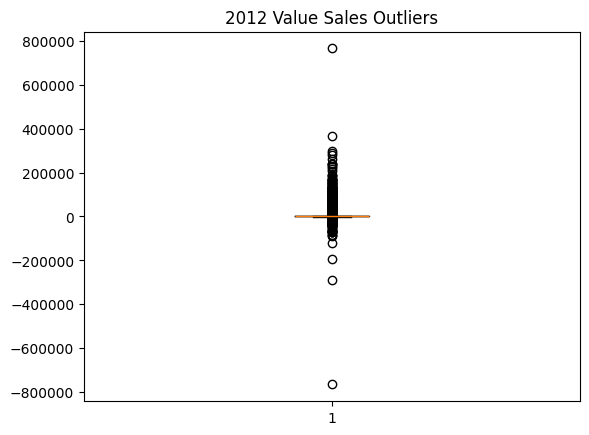

Data after outlier removal: (1022049, 40)


In [6]:
# Boxplot to detect outliers in 'value_sales'
import matplotlib.pyplot as plt

plt.boxplot(df_2012['value_sales'].dropna())
plt.title('2012 Value Sales Outliers')
plt.show()

# Remove outliers beyond 99th percentile
upper_limit = df_2012['value_sales'].quantile(0.99)
df_2012 = df_2012[df_2012['value_sales'] <= upper_limit]

print(f"Data after outlier removal: {df_2012.shape}")

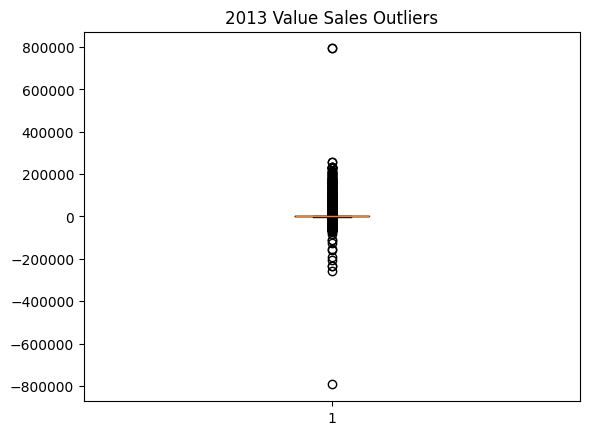

Data after outlier removal: (927932, 43)


In [34]:
# Boxplot to detect outliers in 'value_sales'
import matplotlib.pyplot as plt

plt.boxplot(df_2013['value_sales'].dropna())
plt.title('2013 Value Sales Outliers')
plt.show()

# Remove outliers beyond 99th percentile
upper_limit = df_2013['value_sales'].quantile(0.99)
df_2013 = df_2013[df_2013['value_sales'] <= upper_limit]

print(f"Data after outlier removal: {df_2013.shape}")

In [7]:
# Use .loc to modify the 'customer_code' column
df_2012.loc[:, 'customer_code'] = df_2012['customer_code'].str.strip().str.lower()
df_2013.loc[:, 'customer_code'] = df_2013['customer_code'].str.strip().str.lower()

print("Standardized customer codes:")
print(df_2012['customer_code'].head())
print(df_2013['customer_code'].head())


Standardized customer codes:
0    411800601
1    361000403
2    361000403
3    565540415
4    565540415
Name: customer_code, dtype: object
0    471150112
1    277000801
2    292314701
3    299480703
4    471150015
Name: customer_code, dtype: object


In [8]:
# Check unique customers across datasets using 'customer_code'
common_customers = set(df_2012['customer_code']).intersection(df_2013['customer_code'])

print(f"Common customers between 2012 and 2013: {len(common_customers)}")


print("Sample of common customers:")
print(list(common_customers)[:10])  # Display the first 10 common customers


Common customers between 2012 and 2013: 3315
Sample of common customers:
['352000508', '600275401', '109655501', '952000706', '601510705', '247800300', '364400006', '809900301', '552800507', '289481715']


In [9]:
df_2012.to_csv(r"F:\PYTHON Project Jupyter\2012_Cleaned.csv", index=False)
df_2013.to_csv(r"F:\PYTHON Project Jupyter\2013_Cleaned.csv", index=False)


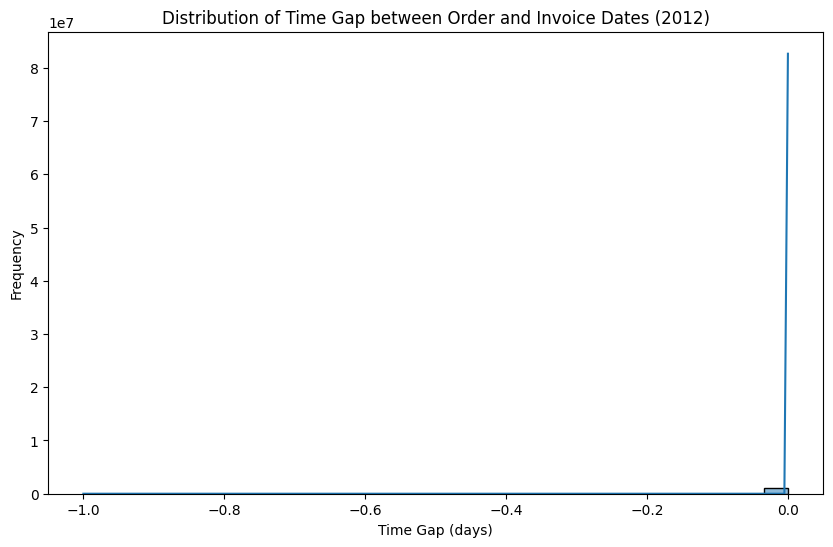

count    1.022049e+06
mean    -6.848987e-06
std      2.617049e-03
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: time_gap, dtype: float64


In [10]:
# Section 2
# Convert dates to datetime format
df_2012['order_date'] = pd.to_datetime(df_2012['order_date'])
df_2012['invoice_date'] = pd.to_datetime(df_2012['invoice_date'])

# Calculate the time gap in days
df_2012['time_gap'] = (df_2012['invoice_date'] - df_2012['order_date']).dt.days

# Plot the distribution of time gaps
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_2012['time_gap'], bins=30, kde=True)
plt.title('Distribution of Time Gap between Order and Invoice Dates (2012)')
plt.xlabel('Time Gap (days)')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
print(df_2012['time_gap'].describe())


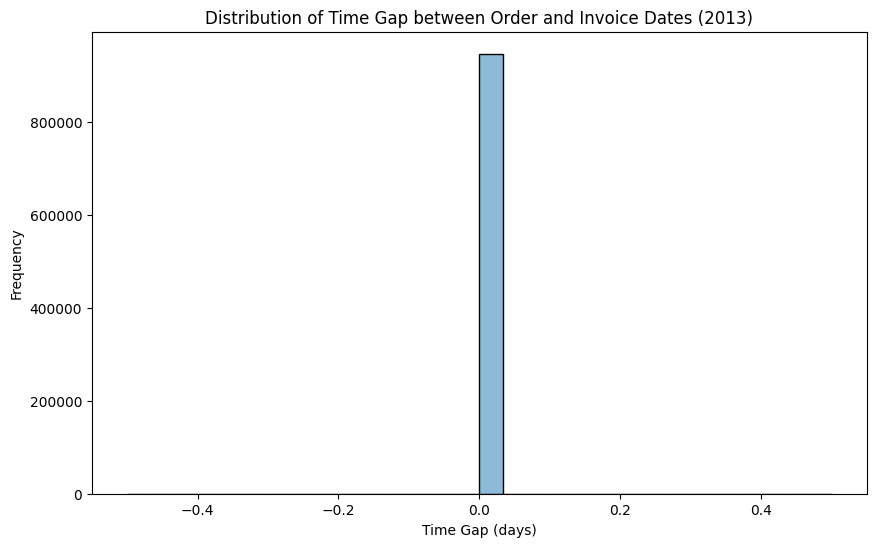

count    947795.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: time_gap, dtype: float64


In [11]:
# Convert dates to datetime format
df_2013['order_date'] = pd.to_datetime(df_2013['order_date'])
df_2013['invoice_date'] = pd.to_datetime(df_2013['invoice_date'])

# Calculate the time gap in days
df_2013['time_gap'] = (df_2013['invoice_date'] - df_2013['order_date']).dt.days

# Plot the distribution of time gaps
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_2013['time_gap'], bins=30, kde=True)
plt.title('Distribution of Time Gap between Order and Invoice Dates (2013)')
plt.xlabel('Time Gap (days)')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
print(df_2013['time_gap'].describe())


In [12]:
# Find common customers between 2012 and 2013
common_customers = set(df_2012['customer_code']).intersection(df_2013['customer_code'])

# Calculate retention rate
total_customers_2012 = df_2012['customer_code'].nunique()
retention_rate = len(common_customers) / total_customers_2012 * 100

print(f"Customer Retention Rate from 2012 to 2013: {retention_rate:.2f}%")


Customer Retention Rate from 2012 to 2013: 85.64%


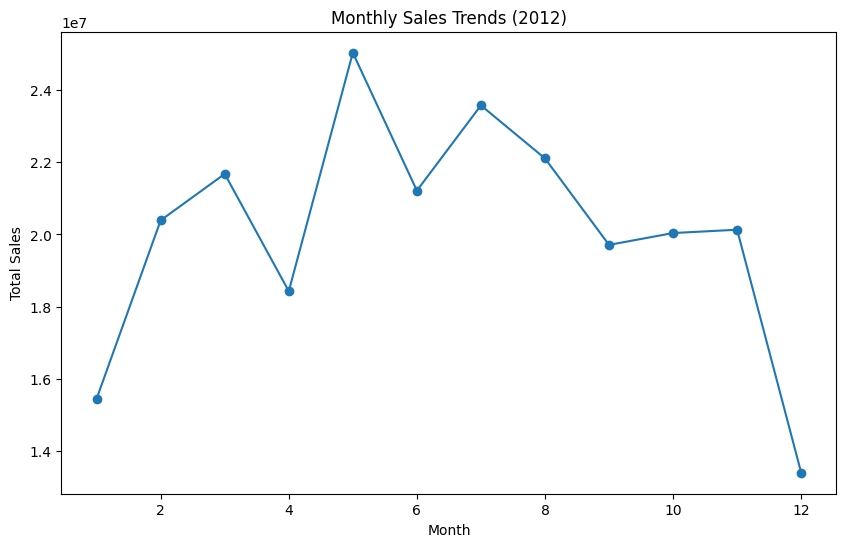

In [13]:
# Aggregate monthly sales
df_2012['calendar_month'] = pd.to_numeric(df_2012['calendar_month'])
monthly_sales = df_2012.groupby('calendar_month')['value_sales'].sum()

# Plot sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends (2012)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


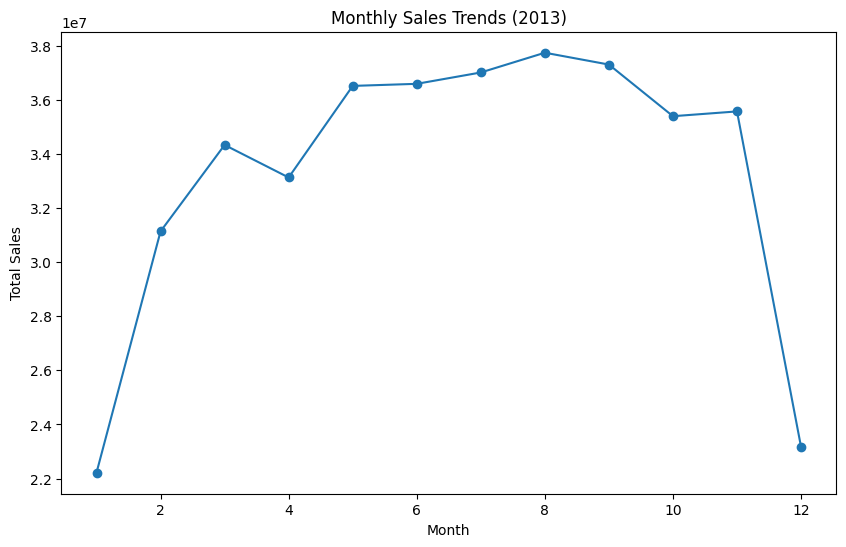

In [14]:
# Aggregate monthly sales
df_2013['calendar_month'] = pd.to_numeric(df_2013['calendar_month'])
monthly_sales = df_2013.groupby('calendar_month')['value_sales'].sum()

# Plot sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends (2013)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


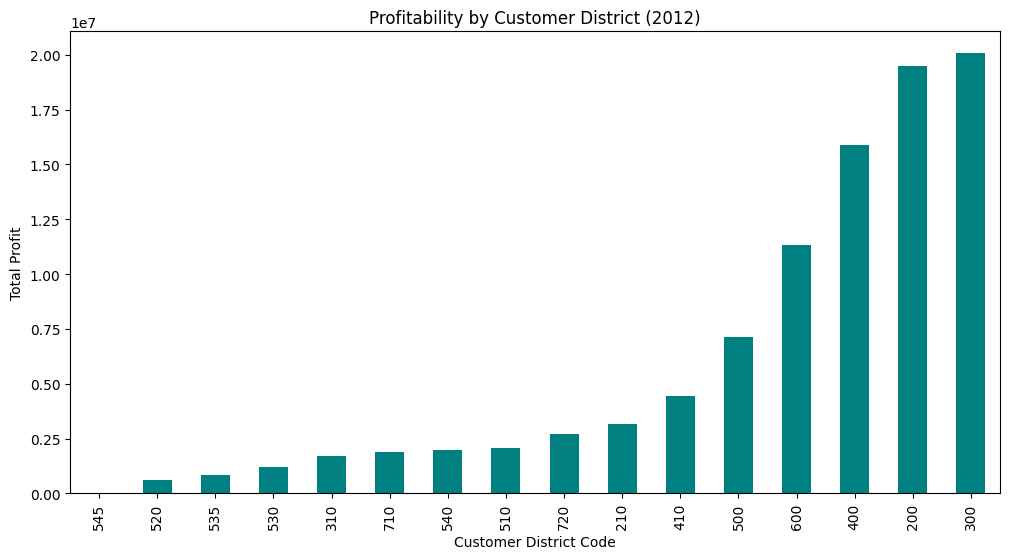

In [15]:
# Calculate profit (sales - cost)
df_2012['profit'] = df_2012['value_sales'] - df_2012['value_cost']

# Aggregate profit by customer district
district_profit = df_2012.groupby('customer_district_code')['profit'].sum().sort_values()

# Plot the profitability by district
plt.figure(figsize=(12, 6))
district_profit.plot(kind='bar', color='teal')
plt.title('Profitability by Customer District (2012)')
plt.xlabel('Customer District Code')
plt.ylabel('Total Profit')
plt.show()


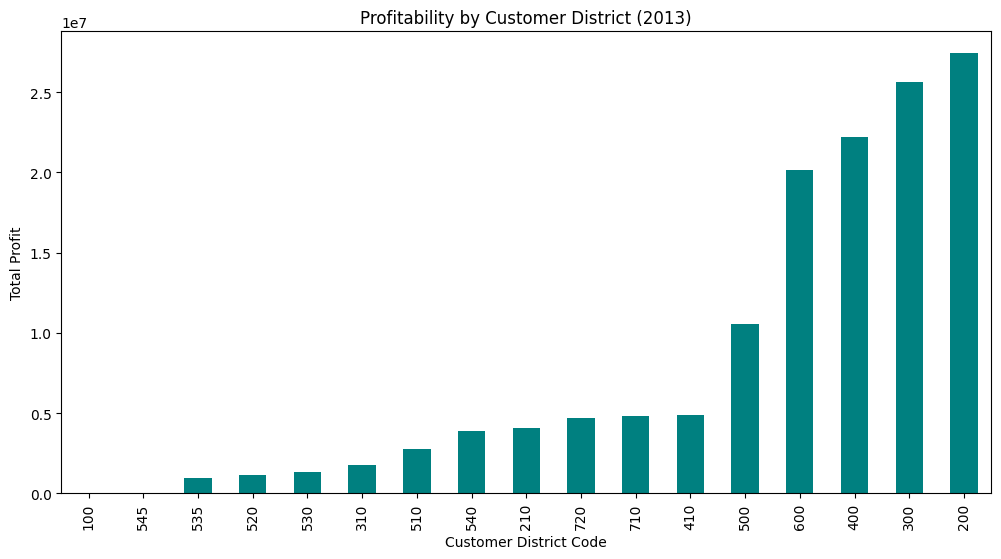

In [16]:
# Calculate profit (sales - cost)
df_2013['profit'] = df_2013['value_sales'] - df_2013['value_cost']

# Aggregate profit by customer district
district_profit = df_2013.groupby('customer_district_code')['profit'].sum().sort_values()

# Plot the profitability by district
plt.figure(figsize=(12, 6))
district_profit.plot(kind='bar', color='teal')
plt.title('Profitability by Customer District (2013)')
plt.xlabel('Customer District Code')
plt.ylabel('Total Profit')
plt.show()


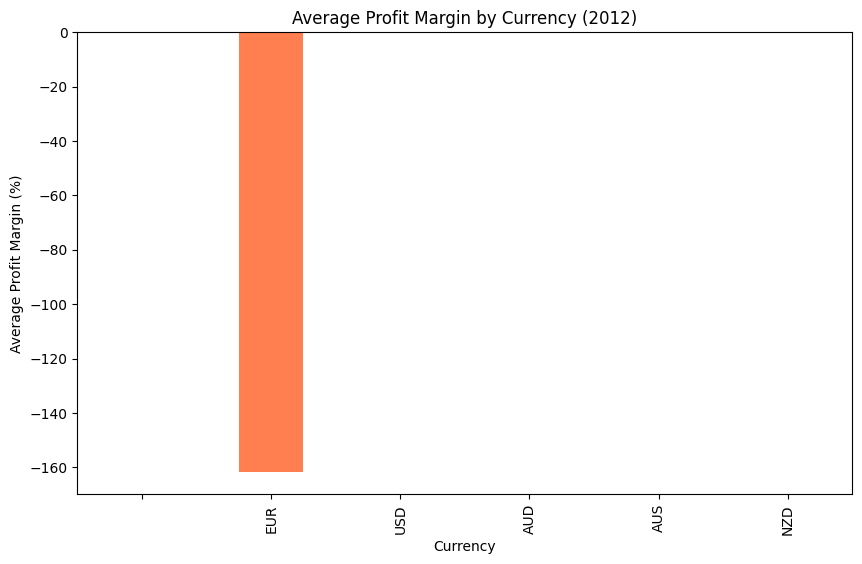

In [17]:
# Calculate profit margin = (profit / sales) * 100
df_2012['profit_margin'] = (df_2012['profit'] / df_2012['value_sales']) * 100

# Aggregate profit margins by currency
currency_margin = df_2012.groupby('currency')['profit_margin'].mean().sort_values()

# Plot the impact of currency on profit margin
plt.figure(figsize=(10, 6))
currency_margin.plot(kind='bar', color='coral')
plt.title('Average Profit Margin by Currency (2012)')
plt.xlabel('Currency')
plt.ylabel('Average Profit Margin (%)')
plt.show()


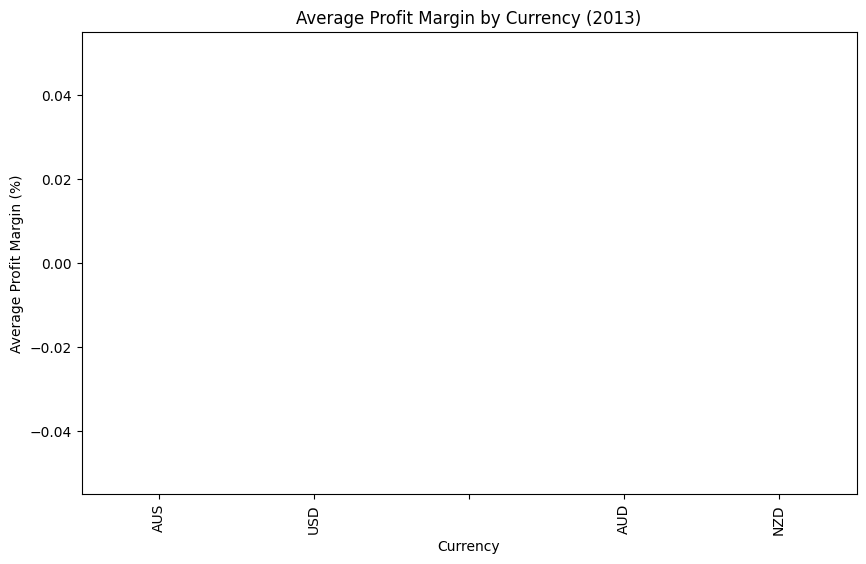

In [18]:
# Calculate profit for 2013 (sales - cost)
df_2013['profit'] = df_2013['value_sales'] - df_2013['value_cost']

# Calculate profit margin for 2013 = (profit / sales) * 100
df_2013['profit_margin'] = (df_2013['profit'] / df_2013['value_sales']) * 100

# Aggregate profit margins by currency
currency_margin_2013 = df_2013.groupby('currency')['profit_margin'].mean().sort_values()

# Plot the impact of currency on profit margin for 2013
plt.figure(figsize=(10, 6))
currency_margin_2013.plot(kind='bar', color='lightblue')
plt.title('Average Profit Margin by Currency (2013)')
plt.xlabel('Currency')
plt.ylabel('Average Profit Margin (%)')
plt.show()


In [19]:
#Section 3
from scipy import stats

# Extract sales data for both years
sales_2012 = df_2012['value_sales'].dropna()
sales_2013 = df_2013['value_sales'].dropna()

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(sales_2012, sales_2013)

# Display results
print(f"T-statistic: {t_statistic}, P-value: {p_value}")


T-statistic: -56.12475082785822, P-value: 0.0


In [21]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Ensure 'value_cost' and 'value_sales' are numeric
def clean_numeric_column(df, column):
    """Convert column to numeric, report non-numeric entries."""
    df[column] = pd.to_numeric(df[column], errors='coerce')
    non_numeric = df[column].isna().sum()
    print(f"Non-numeric values in {column}: {non_numeric}")
    return df

df_2012 = clean_numeric_column(df_2012, 'value_cost')
df_2012 = clean_numeric_column(df_2012, 'value_sales')
df_2013 = clean_numeric_column(df_2013, 'value_cost')
df_2013 = clean_numeric_column(df_2013, 'value_sales')

# Check data types after conversion
print("Data types after conversion:")
print(df_2012[['value_cost', 'value_sales']].dtypes)
print(df_2013[['value_cost', 'value_sales']].dtypes)

# 2. Calculate profit and profit margin safely
df_2012['profit'] = df_2012['value_sales'] - df_2012['value_cost']
df_2013['profit'] = df_2013['value_sales'] - df_2013['value_cost']

# Replace 0s with NaN to avoid division errors
df_2012['value_sales'] = df_2012['value_sales'].replace(0, pd.NA)
df_2013['value_sales'] = df_2013['value_sales'].replace(0, pd.NA)

# Calculate profit margin
df_2012['profit_margin'] = (df_2012['profit'] / df_2012['value_sales']) * 100
df_2013['profit_margin'] = (df_2013['profit'] / df_2013['value_sales']) * 100

# 3. Check for NaN values in profit margin columns
nan_count_2012 = df_2012['profit_margin'].isna().sum()
nan_count_2013 = df_2013['profit_margin'].isna().sum()

print(f"NaN values in 2012 profit margin: {nan_count_2012}")
print(f"NaN values in 2013 profit margin: {nan_count_2013}")

# Drop NaN values from profit margins to avoid issues in analysis
df_2012 = df_2012.dropna(subset=['profit_margin'])
df_2013 = df_2013.dropna(subset=['profit_margin'])

# 4. Describe profit margin data
print("\n2012 Profit Margin Description:")
print(df_2012['profit_margin'].describe())

print("\n2013 Profit Margin Description:")
print(df_2013['profit_margin'].describe())

# 5. Investigate unique profit margin values by currency
for currency in df_2012['currency'].unique():
    print(f"\nProfit margins for currency {currency} in 2012:")
    print(df_2012[df_2012['currency'] == currency]['profit_margin'].unique())

    print(f"\nProfit margins for currency {currency} in 2013:")
    print(df_2013[df_2013['currency'] == currency]['profit_margin'].unique())

# 6. Conduct T-tests for profit margins across currencies
results = {}
for currency in df_2012['currency'].unique():
    # Filter profit margins for each currency
    profit_margin_2012 = df_2012[df_2012['currency'] == currency]['profit_margin']
    profit_margin_2013 = df_2013[df_2013['currency'] == currency]['profit_margin']

    # Ensure enough valid data points
    if len(profit_margin_2012) > 1 and len(profit_margin_2013) > 1:
        t_statistic, p_value = stats.ttest_ind(profit_margin_2012, profit_margin_2013, nan_policy='omit')
        results[currency] = (t_statistic, p_value)
    else:
        results[currency] = ("Not Enough Data", None)

# 7. Display T-test results for each currency
for currency, (t_stat, p_val) in results.items():
    if p_val is not None:
        print(f"{currency} - T-statistic: {t_stat}, P-value: {p_val}")
    else:
        print(f"{currency} - {t_stat}")


Non-numeric values in value_cost: 0
Non-numeric values in value_sales: 0
Non-numeric values in value_cost: 0
Non-numeric values in value_sales: 0
Data types after conversion:
value_cost     float64
value_sales    float64
dtype: object
value_cost     float64
value_sales    float64
dtype: object
NaN values in 2012 profit margin: 0
NaN values in 2013 profit margin: 0

2012 Profit Margin Description:
count    1.010524e+06
mean     3.823058e+01
std      2.191094e+03
min     -1.248400e+06
25%      4.115113e+01
50%      5.070690e+01
75%      6.175166e+01
max      1.000000e+02
Name: profit_margin, dtype: float64

2013 Profit Margin Description:
count    9.373050e+05
mean     4.270063e+01
std      2.699300e+03
min     -1.764706e+06
25%      4.054516e+01
50%      5.174343e+01
75%      6.338462e+01
max      1.000000e+02
Name: profit_margin, dtype: float64

Profit margins for currency AUD in 2012:
[18.40769231 33.4984326  36.67462687 ... 25.138322   36.36716792
 20.7664    ]

Profit margins for cu

In [22]:
#Section 4
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Ensure numeric columns are properly formatted
df_2012['value_sales'] = pd.to_numeric(df_2012['value_sales'], errors='coerce')
df_2012['value_cost'] = pd.to_numeric(df_2012['value_cost'], errors='coerce')
df_2012['profit_margin'] = pd.to_numeric(df_2012['profit_margin'], errors='coerce')

# Handle missing values (choose one approach)
df_2012.dropna(subset=['value_sales', 'value_cost', 'profit_margin'], inplace=True)
# or fill NaN values
# df_2012.fillna(df_2012.mean(), inplace=True)

# Prepare data for regression analysis
X = df_2012[['value_sales', 'value_cost']]  # Independent variables
X = sm.add_constant(X)  # Add a constant term for the intercept
y = df_2012['profit_margin']  # Dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          profit_margin   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9200
Date:                Thu, 31 Oct 2024   Prob (F-statistic):              0.399
Time:                        22:50:51   Log-Likelihood:            -9.2070e+06
No. Observations:             1010524   AIC:                         1.841e+07
Df Residuals:                 1010521   BIC:                         1.841e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          38.6378      2.255     17.136      

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 1. Load and prepare your data (Extract predictors and target variable)
X2 = df_2013[['value_cost', 'value_quantity', 'value_price_adjustment']].copy()  # Create a copy to avoid warnings
y2 = df_2013['value_sales'].copy()  # Target variable

# 2. Check data types of X2 and identify problematic columns
print("Data Types of X2 Columns:")
print(X2.dtypes)

# 3. Identify and handle non-numeric columns
non_numeric_cols = X2.select_dtypes(exclude=[np.number]).columns
if not non_numeric_cols.empty:
    print(f"Non-numeric columns in X2: {non_numeric_cols}")

    # Inspect a few values from non-numeric columns
    for col in non_numeric_cols:
        print(f"{col}: {X2[col].unique()[:5]}")

    # Convert non-numeric columns to numeric with coercion
    X2[non_numeric_cols] = X2[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# 4. Handle NaN values
print("\nNaN values in X2 after coercion:")
print(X2.isna().sum())

# Drop rows with NaN values and align with y2
X2 = X2.dropna()
y2 = y2.loc[X2.index]  # Align target variable with predictors

# 5. Add a constant term for the intercept
X2 = sm.add_constant(X2)

# 6. Verify data types and shape alignment
print("\nData Types of X2 after cleaning:")
print(X2.dtypes)
print(f"Shape of X2: {X2.shape}, Shape of y2: {y2.shape}")

# 7. Ensure all columns are numeric
assert all([np.issubdtype(dt, np.number) for dt in X2.dtypes]), "X2 still contains non-numeric data!"
assert np.issubdtype(y2.dtype, np.number), "y2 contains non-numeric data!"

# 8. Fit the OLS model
model2 = sm.OLS(y2, X2).fit()

# 9. Display the summary
print(model2.summary())


Data Types of X2 Columns:
value_cost                float64
value_quantity            float64
value_price_adjustment      int64
dtype: object

NaN values in X2 after coercion:
value_cost                0
value_quantity            0
value_price_adjustment    0
dtype: int64

Data Types of X2 after cleaning:
const                     float64
value_cost                float64
value_quantity            float64
value_price_adjustment      int64
dtype: object
Shape of X2: (937305, 4), Shape of y2: (937305,)
                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 1.488e+06
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:50:52   Log-Likelihood:            -8.0641e+06
No. Observations:   

In [24]:
#Section 5
import pandas as pd
import numpy as np

# Load the datasets with memory optimization
data_2012 = pd.read_csv(r"F:\PYTHON Project Jupyter\2012_Data.csv", encoding='ISO-8859-1', low_memory=False)
data_2013 = pd.read_csv(r"F:\PYTHON Project Jupyter\2013_Data.csv", encoding='ISO-8859-1', low_memory=False)

# Combine both datasets
data = pd.concat([data_2012, data_2013], ignore_index=True)
print(f"Combined Data Shape: {data.shape}")


Combined Data Shape: (1988382, 41)


In [25]:
# Convert dates to datetime format
data['invoice_date'] = pd.to_datetime(data['invoice_date'])
data['order_date'] = pd.to_datetime(data['order_date'])

# Drop columns that won't be useful for prediction
data = data.drop(['invoice_number', 'line_number', 'order_date', 
                  'customer_order_number', 'dss_update_time'], axis=1)

# Handle missing values (can also use imputation techniques)
data = data.dropna()

# Ensure all numeric columns are correctly cast
numeric_cols = ['value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [26]:
# Extract temporal features
data['month'] = data['invoice_date'].dt.month
data['year'] = data['invoice_date'].dt.year

# Create aggregate features (monthly total sales)
monthly_data = data.groupby(['year', 'month', 'item_code']).agg({
    'value_sales': 'sum',
    'value_quantity': 'sum'
}).reset_index()

# Create lag features (previous months' sales)
monthly_data['sales_lag_1'] = monthly_data.groupby('item_code')['value_sales'].shift(1)
monthly_data['sales_lag_2'] = monthly_data.groupby('item_code')['value_sales'].shift(2)

# Drop rows with NaN values from lag features
monthly_data = monthly_data.dropna()

print(monthly_data.head())


Empty DataFrame
Columns: [year, month, item_code, value_sales, value_quantity, sales_lag_1, sales_lag_2]
Index: []


In [27]:
#Section 5
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Merge 2012 and 2013 data
data = pd.concat([df_2012, df_2013], axis=0)

# Step 2: Extract relevant features
data['month'] = pd.to_datetime(data['accounting_date']).dt.month
data['year'] = pd.to_datetime(data['accounting_date']).dt.year

# Select the key features for the model
data = data[['year', 'month', 'value_sales', 'value_quantity', 
             'value_cost', 'value_price_adjustment']]

# Step 3: Create lag features to capture trends from previous months
data = data.sort_values(['year', 'month']).reset_index(drop=True)
data['sales_lag_1'] = data['value_sales'].shift(1)
data['sales_lag_2'] = data['value_sales'].shift(2)

# Drop NaN values created by the lag features
data = data.dropna()

# Step 4: Split data into features (X) and target variable (y)
X = data[['month', 'value_quantity', 'value_cost', 'value_price_adjustment', 
          'sales_lag_1', 'sales_lag_2']]
y = data['value_sales']

# Step 5: Train-test split (2012-2013 data used for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Step 9: Predict sales for 2014 (using latest available data)
# Simulate 2014 predictions using the last known values from 2013
latest_data = data.iloc[-2:]  # Get the last two rows for lag features

# Create a sample input for January 2014
jan_2014 = {
    'month': 1, 
    'value_quantity': latest_data['value_quantity'].values[-1],
    'value_cost': latest_data['value_cost'].values[-1],
    'value_price_adjustment': latest_data['value_price_adjustment'].values[-1],
    'sales_lag_1': latest_data['value_sales'].values[-1],  # Dec 2013 sales
    'sales_lag_2': latest_data['value_sales'].values[-2]   # Nov 2013 sales
}

# Convert the dictionary to a DataFrame
jan_2014_df = pd.DataFrame([jan_2014])

# Make a prediction for January 2014
jan_2014_sales_pred = model.predict(jan_2014_df)
print(f"Predicted Sales for January 2014: {jan_2014_sales_pred[0]:.2f}")


Test RMSE: 1494.98, R²: 0.70
Predicted Sales for January 2014: 87.98


In [28]:
#Section 6
import pandas as pd
import numpy as np

# Extract relevant columns for customer analysis
data_2012 = data_2012[['customer_code', 'value_sales']]
data_2013 = data_2013[['customer_code', 'value_sales']]

# Get unique customer codes from both years
customers_2012 = set(data_2012['customer_code'].unique())
customers_2013 = set(data_2013['customer_code'].unique())

# Identify churned customers (present in 2012, not in 2013)
churned_customers = customers_2012 - customers_2013

# Add a 'churn' label: 1 for churned, 0 for retained
data_2012['churn'] = data_2012['customer_code'].apply(lambda x: 1 if x in churned_customers else 0)


In [29]:
# Aggregate sales and frequency metrics for each customer in 2012
customer_features_2012 = data_2012.groupby('customer_code').agg({
    'value_sales': ['sum', 'mean', 'count']
}).reset_index()

# Rename columns for clarity
customer_features_2012.columns = ['customer_code', 'total_sales', 'avg_sales', 'purchase_frequency']

# Merge with churn labels
customer_data = pd.merge(customer_features_2012, data_2012[['customer_code', 'churn']].drop_duplicates(), on='customer_code')

print(customer_data.head())


  customer_code  total_sales    avg_sales  purchase_frequency  churn
0     100210100     66374.08  2458.299259                  27      0
1     100230100     36742.00  9185.500000                   4      0
2     100250200       656.40   218.800000                   3      0
3     100270100      1234.71   154.338750                   8      0
4     100296100       180.00   180.000000                   1      1


In [30]:
from sklearn.model_selection import train_test_split

# Define features and target
X = customer_data[['total_sales', 'avg_sales', 'purchase_frequency']]
y = customer_data['churn']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[688   1]
 [ 90   1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       689
           1       0.50      0.01      0.02        91

    accuracy                           0.88       780
   macro avg       0.69      0.50      0.48       780
weighted avg       0.84      0.88      0.83       780



In [32]:
# Get feature importance (coefficients) from the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients.sort_values(by='Coefficient', ascending=False))


              Feature  Coefficient
1           avg_sales     0.000053
0         total_sales    -0.000004
2  purchase_frequency    -0.014974


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       689
           1       0.39      0.41      0.40        91

    accuracy                           0.86       780
   macro avg       0.66      0.66      0.66       780
weighted avg       0.86      0.86      0.86       780

              Feature  Importance
0         total_sales    0.385227
1           avg_sales    0.344763
2  purchase_frequency    0.270010
